In [ ]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc
import matplotlib.pyplot as plt

In [ ]:
img = misc.ascent()

In [ ]:
img.shape

(512, 512)

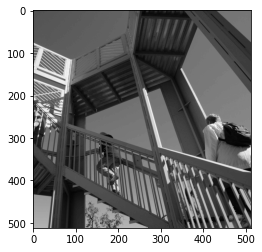

In [ ]:
plt.imshow(img, cmap = 'gray')

In [ ]:
import numpy as np
h_kernel = np.array([[1,2,1],
                     [0,0,0],
                     [-1,-2,-1]])

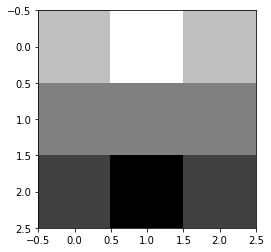

In [ ]:
plt.imshow(h_kernel, cmap = 'gray')

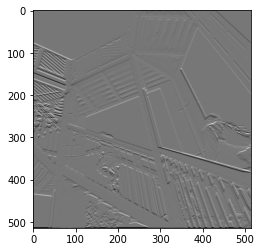

In [ ]:
# filter the image using convolution
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap = 'gray')

**Convolutional Neural Networks**

In [ ]:
from keras.layers import Conv2D

In [ ]:
img.shape

(512, 512)

In [ ]:
img_tensor = img.reshape((1, 512, 512, 1)) # number of images, image height, image width, no of color channels

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2,1), input_shape = (512, 512, 1)))
model.compile('adam', 'mse')

In [ ]:
img_pred_tensor = model.predict(img_tensor)

In [ ]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [ ]:
img_pred = img_pred_tensor[0,:,:,0]

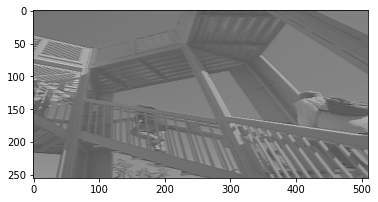

In [ ]:
plt.imshow(img_pred, cmap = 'gray')

In [ ]:
weights = model.get_weights()

In [ ]:
weights[0].shape

(3, 3, 1, 1)

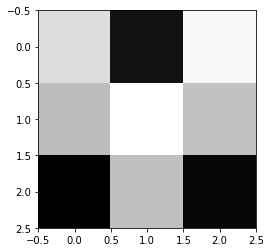

In [ ]:
plt.imshow(weights[0][:,:,0,0], cmap = 'gray')

In [ ]:
weights[0] = np.ones(weights[0].shape)

In [ ]:
model.set_weights(weights)

In [ ]:
img_pred = img_pred_tensor[0,:,:,0]

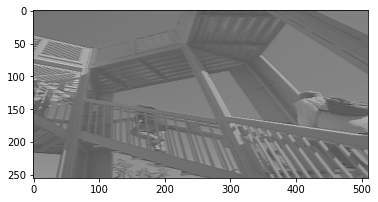

In [ ]:
plt.imshow(img_pred, cmap = 'gray')

In [ ]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape = (512, 512, 1), padding = 'same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 512, 512, 1)

**Pooling Layers**

In [ ]:
from keras.layers import MaxPool2D, AvgPool2D

In [ ]:
model = Sequential()
model.add(MaxPool2D((5,5), input_shape = (512, 512, 1)))
model.compile('adam', 'mse')

In [ ]:
img_pred = model.predict(img_tensor)[0,:,:,0]

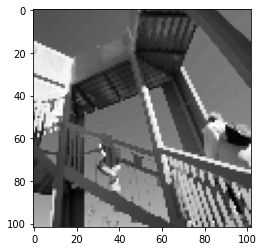

In [ ]:
plt.imshow(img_pred, cmap = 'gray')

In [ ]:
model = Sequential()
model.add(AvgPool2D((5,5), input_shape = (512, 512, 1)))
model.compile('adam', 'mse')

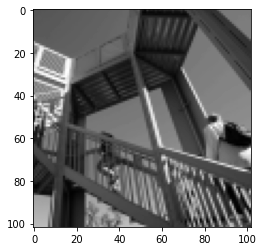

In [ ]:
img_pred = model.predict(img_tensor)[0,:,:,0]
plt.imshow(img_pred, cmap = 'gray')

**Final Architecture**

***Classification of mnist dataset using convoluntional neural network***

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

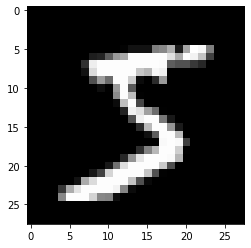

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')

In [ ]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
y_train_cat.shape

(60000, 10)

In [ ]:
y_test_cat.shape

(10000, 10)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

***Fully connected on images***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
h = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 7s 18ms/step - loss: 0.6315 - accuracy: 0.7979 - val_loss: 0.1598 - val_accuracy: 0.9511
Epoch 2/10
329/329 [==============================] - 6s 18ms/step - loss: 0.1216 - accuracy: 0.9632 - val_loss: 0.1760 - val_accuracy: 0.9496
Epoch 3/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0742 - accuracy: 0.9770 - val_loss: 0.1078 - val_accuracy: 0.9702
Epoch 4/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0515 - accuracy: 0.9850 - val_loss: 0.1388 - val_accuracy: 0.9646
Epoch 5/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.1064 - val_accuracy: 0.9744
Epoch 6/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.1590 - val_accuracy: 0.9669
Epoch 7/10
329/329 [==============================] - 6s 17ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.1281 - val_accuracy: 0.9730

Text(0.5, 0, 'Epochs')

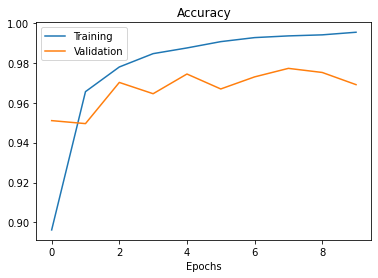

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [ ]:
test_accuracy = model.evaluate(X_test, y_test_cat)
test_accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.1613 - accuracy: 0.9725


[0.16134990751743317, 0.9725000262260437]

**Fully Connected Architecture**

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
from keras.layers import Flatten, Activation

In [ ]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), ))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 22s 66ms/step - loss: 0.5292 - accuracy: 0.8377 - val_loss: 0.1886 - val_accuracy: 0.9401
Epoch 2/5
329/329 [==============================] - 21s 65ms/step - loss: 0.0992 - accuracy: 0.9705 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 3/5
329/329 [==============================] - 21s 65ms/step - loss: 0.0583 - accuracy: 0.9835 - val_loss: 0.0691 - val_accuracy: 0.9782
Epoch 4/5
329/329 [==============================] - 21s 65ms/step - loss: 0.0380 - accuracy: 0.9892 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 5/5
329/329 [==============================] - 21s 65ms/step - loss: 0.0261 - accuracy: 0.9927 - val_loss: 0.0673 - val_accuracy: 0.9807


In [ ]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 2s 7ms/step - loss: 0.0624 - accuracy: 0.9811


[0.06241271272301674, 0.9811000227928162]